In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk(r'D:\Mini\project\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Mini\project\dataset\Bird-drop\Bird (1).jpeg
D:\Mini\project\dataset\Bird-drop\Bird (10).jpg
D:\Mini\project\dataset\Bird-drop\Bird (100).jpg
D:\Mini\project\dataset\Bird-drop\Bird (101).jpg
D:\Mini\project\dataset\Bird-drop\Bird (102).jpg
D:\Mini\project\dataset\Bird-drop\Bird (103).jpg
D:\Mini\project\dataset\Bird-drop\Bird (104).jpg
D:\Mini\project\dataset\Bird-drop\Bird (105).jpg
D:\Mini\project\dataset\Bird-drop\Bird (106).jpg
D:\Mini\project\dataset\Bird-drop\Bird (107).jpg
D:\Mini\project\dataset\Bird-drop\Bird (108).jpg
D:\Mini\project\dataset\Bird-drop\Bird (109).jpg
D:\Mini\project\dataset\Bird-drop\Bird (11).jpg
D:\Mini\project\dataset\Bird-drop\Bird (110).jpg
D:\Mini\project\dataset\Bird-drop\Bird (111).jpg
D:\Mini\project\dataset\Bird-drop\Bird (112).jpg
D:\Mini\project\dataset\Bird-drop\Bird (113).jpg
D:\Mini\project\dataset\Bird-drop\Bird (114).jpg
D:\Mini\project\dataset\Bird-drop\Bird (115).jpg
D:\Mini\project\dataset\Bird-drop\Bird (116).jpg
D:\Mini\project\dataset

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

c:\Users\gagan aditya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
#Create Files_Name
image_data="D:\Mini\project\dataset"
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,Bird-drop
1,Clean
2,Dusty
3,Electrical-damage
4,Physical-Damage
5,Snow-Covered


In [39]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [40]:
class_names = train.class_names
class_names

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

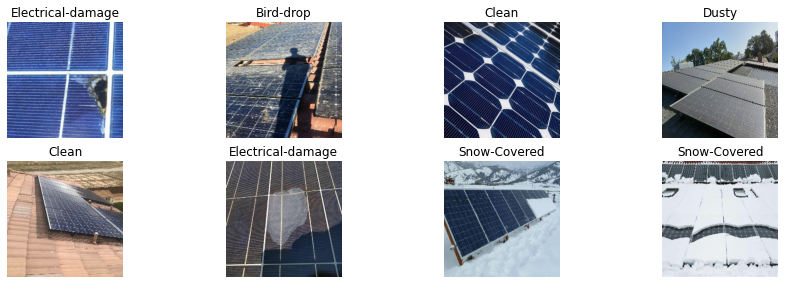

In [41]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [42]:
import tensorflow as tf
from tensorflow import keras

# Define MobileNetV3Small with pre-trained weights
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Build the sequential model
keras_model = keras.models.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

# Provide a sample input
sample_input = tf.random.normal((1, 224, 224, 3))

# Call the model with the sample input to initialize the shapes
_ = keras_model(sample_input)

keras_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dropout_1 (Dropout)         (None, 28224)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 169350    
                                                                 
Total params: 1108470 (4.23 MB)
Trainable params: 169350 (661.52 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


In [44]:
checkpoint = ModelCheckpoint("my_keras_model.keras", save_best_only=True)


In [45]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [46]:
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = keras_model.fit(train, epochs=10, validation_data=validation, callbacks=[checkpoint, early_stopping])

Epoch 1/10


23/23 [==============================] - 26s 715ms/step - loss: 3.1480 - accuracy: 0.4915 - val_loss: 0.4807 - val_accuracy: 0.8814
Epoch 2/10
23/23 [==============================] - 15s 576ms/step - loss: 0.5942 - accuracy: 0.8898 - val_loss: 0.5388 - val_accuracy: 0.9040
Epoch 3/10
23/23 [==============================] - 15s 591ms/step - loss: 0.1975 - accuracy: 0.9576 - val_loss: 0.2528 - val_accuracy: 0.9492
Epoch 4/10
23/23 [==============================] - 13s 502ms/step - loss: 0.1244 - accuracy: 0.9703 - val_loss: 0.2718 - val_accuracy: 0.9322
Epoch 5/10
23/23 [==============================] - 13s 509ms/step - loss: 0.1155 - accuracy: 0.9760 - val_loss: 0.3503 - val_accuracy: 0.9379
Epoch 6/10
23/23 [==============================] - 13s 503ms/step - loss: 0.1381 - accuracy: 0.9788 - val_loss: 0.2975 - val_accuracy: 0.9492
Epoch 7/10
23/23 [==============================] - 14s 581ms/step - loss: 0.1089 - accuracy: 0.9760 - val_loss: 0.2286 - val_accuracy: 0.94

In [47]:
keras_model.save('mobilev3.h5')

In [48]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,3.148007,0.491525,0.480670,0.881356
1,0.594213,0.889831,0.538834,0.903955
2,0.197535,0.957627,0.252813,0.949153
3,0.124426,0.970339,0.271764,0.932203
4,0.115462,0.975989,0.350331,0.937853
5,0.138093,0.978814,0.297514,0.949153
6,0.108928,0.975989,0.228617,0.949153
7,0.148587,0.971751,0.500551,0.915254
8,0.078782,0.985876,0.358151,0.937853
9,0.076674,0.984463,0.371490,0.949153


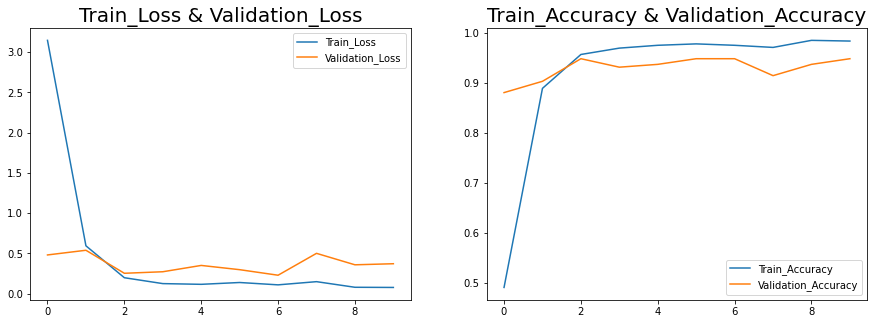

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [50]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

6/6 [==============================] - 4s 303ms/step


,Actual,Prediction
0,0,0
1,2,2
2,0,2
3,0,0
4,0,0
...,...,...
172,1,2
173,3,3
174,1,1
175,3,3


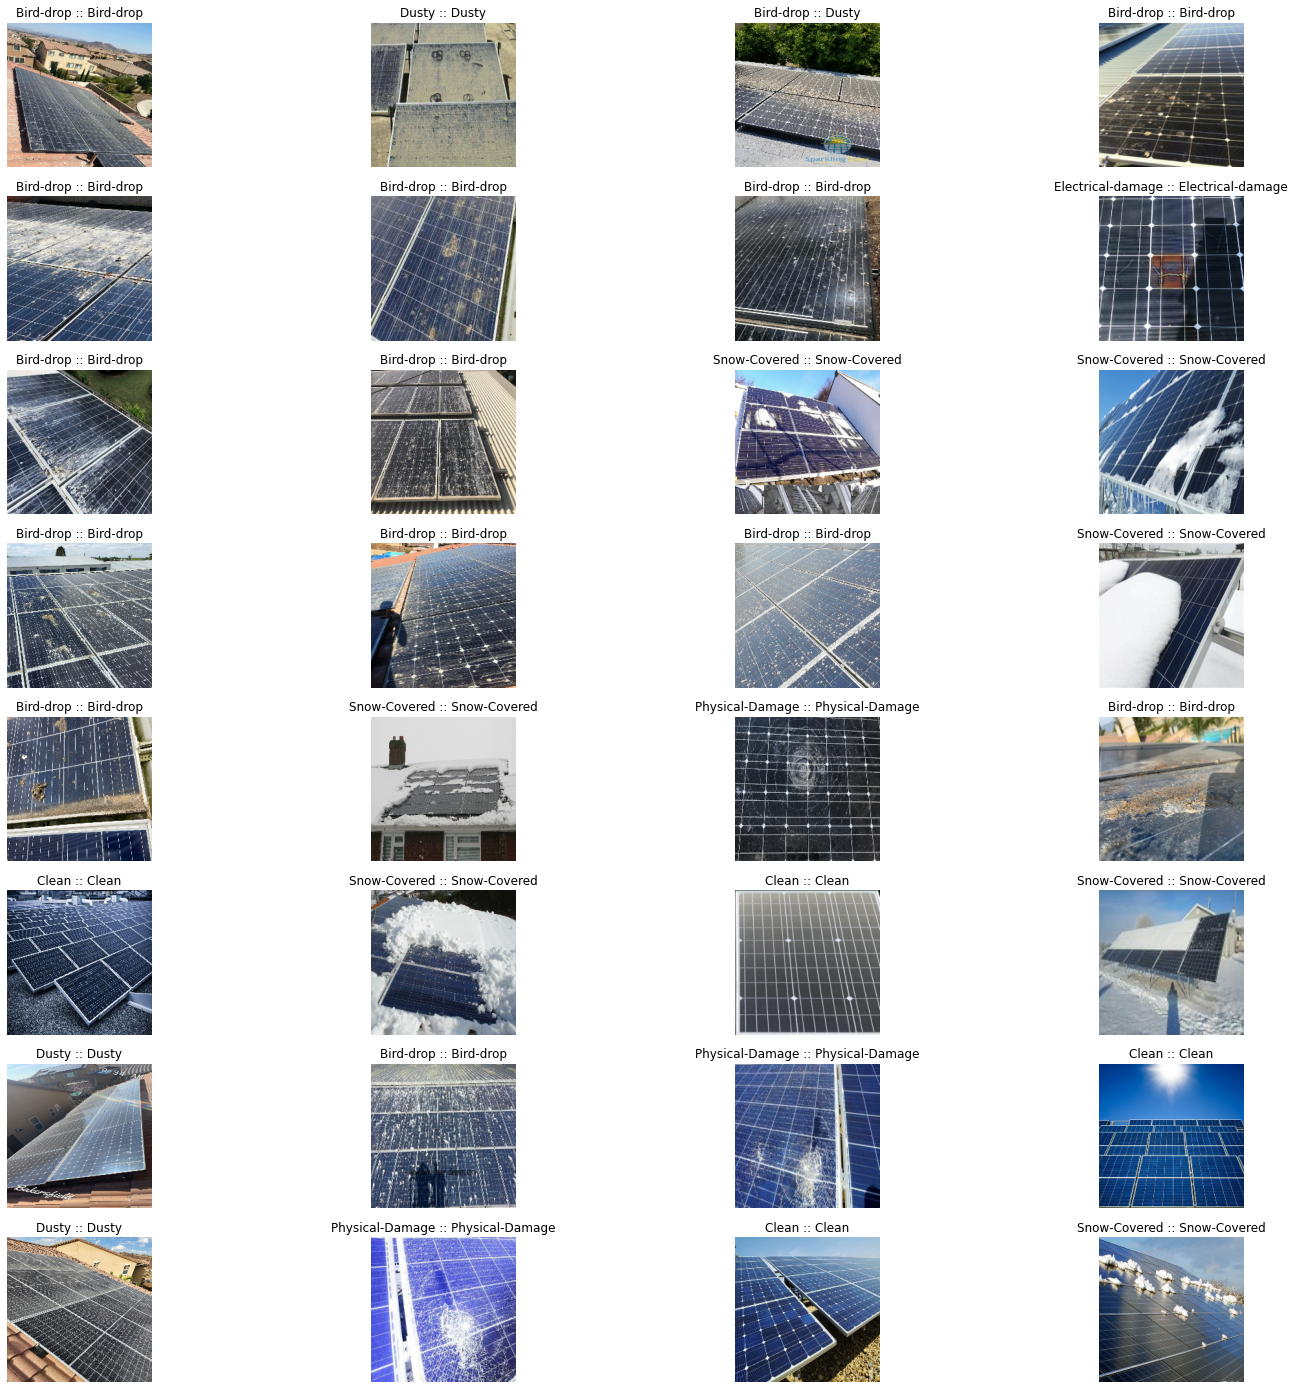

In [51]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

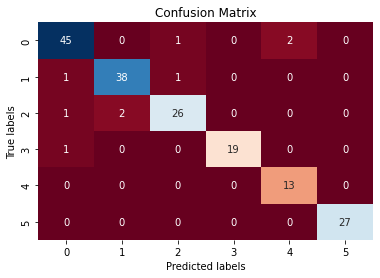

array([[45,  0,  1,  0,  2,  0],
       [ 1, 38,  1,  0,  0,  0],
       [ 1,  2, 26,  0,  0,  0],
       [ 1,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 27]], dtype=int64)

In [52]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [53]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 94.915%


In [54]:
# import tensorflow as tf
import keras
loaded_model = keras.models.load_model('mobilev3.h5')
print(np.argmax(loaded_model.predict(np.array([X_val[0]]))))

1/1 [==============================] - 2s 2s/step
0


In [55]:
loaded_model.save('model.hdf5')

In [56]:
np.array([X_val[0]]).shape

(1, 224, 224, 3)

In [ ]:
from flask import Flask , render_template , request
import cv2 as cv 
import numpy as np
import keras
app = Flask(__name__)

@app.route('/',methods=['GET'])
def hello_world():
    return render_template('index.html')

@app.route('/',methods=['POST'])
def predict():
    d={
0:'Bird-drop',
 1:'Clean',
 2:'Dusty',
 3:'Electrical-damage',
 4:'Physical-Damage',
 5:'Snow-Covered'}
    imagefile= request.files['imagefile']
    image_path = './'+ imagefile.filename
    save_path='./templates/'+imagefile.filename
    print(save_path)
    imagefile.save(save_path)
    img=cv.imread(save_path)
    img=cv.resize(img,(224, 224))
    img=np.array([img])
    loaded_model = keras.models.load_model('mobilev3.h5')
    res=np.argmax(loaded_model.predict(img))
    return render_template('index.html',prediction=d[res],path=image_path)
if __name__ == '__main__':
    app.run()